Ultralytics YOLOv8.0.26  Python-3.8.10 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

0: 416x416 1 male, 12.3ms
Speed: 0.0ms pre-process, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 male, 16.9ms
Speed: 6.1ms pre-process, 16.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)


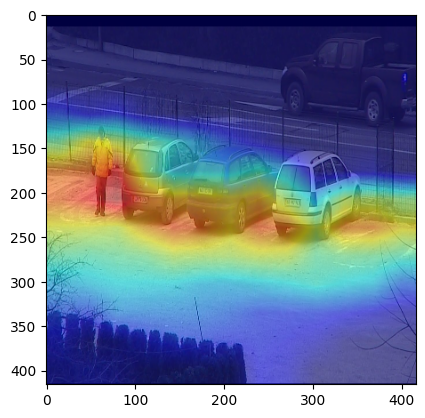


0: 416x416 1 male, 20.8ms
Speed: 0.0ms pre-process, 20.8ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 male, 17.3ms
Speed: 1.0ms pre-process, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


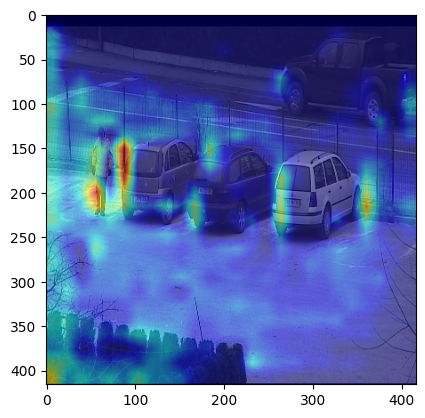


0: 416x416 1 male, 14.6ms
Speed: 0.0ms pre-process, 14.6ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 male, 19.0ms
Speed: 2.9ms pre-process, 19.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)


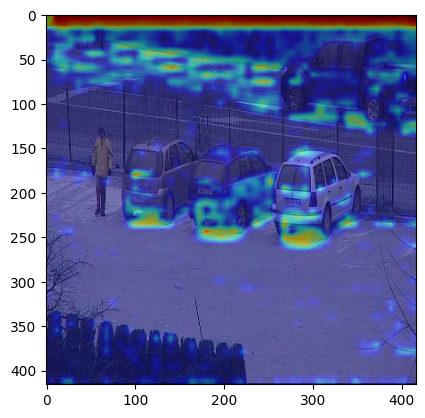

In [2]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your YOLOv8 model
model = YOLO('your-model-path')

# Load and prepare the image
img_path = 'your-img-path'
img = cv2.imread(img_path)
img = cv2.resize(img, (416, 416))
rgb_img = img.copy()
img = np.float32(img) / 255
targrt_list = [-3, -7, -20]
for target in targrt_list:
    target_layers =[model.model.model[target]]
    cam = EigenCAM(model, target_layers, task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    cam = EigenCAM(model, target_layers, task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    plt.imshow(cam_image)
    plt.show()